### Individual Models for the Vintage Models
Here are the vintage model running for TiO2, SiO2 and FeOx

### Import Packages and Helper Functions

In [2]:
import sys
sys.path.append('./packages')

import vintage_model as vt
import numpy as np
import csv
import matplotlib.pylab as plt
from matplotlib import style
style.use('ggplot')

def csv_to_dict(csv_file):
    with open(csv_file,'rU') as myfile:
        this_reader = csv.reader(myfile)
        # skip the first row
        next(this_reader, None)
        ''' row[0] is the sector name; row[1] percentage; row[2] average_lifetime; row[3] is the in use release rate '''
        market_dict = {rows[0]:[rows[1],rows[2],rows[3],rows[4],rows[5],rows[6]] for rows in this_reader}
    return market_dict

# test
market_data_dict = csv_to_dict('./data/coating_market_fake.csv')
print market_data_dict

{'Household & Furniture': ['0.14', '10', '0.06', '8', '5', '2'], 'Automotive': ['0.06', '13', '0.06', '8', '5', '1'], 'Medical': ['0.13', '15', '0.06', '0', '6', '5'], 'Other Industries': ['0.1', '20', '0.06', '2', '5', '5'], 'Packaging': ['0.06', '2', '0.06', '0', '2', '1'], 'Electronics': ['0.06', '5', '0.06', '0', '2', '2'], 'Construction & Building': ['0.45', '60', '0.06', '10', '10', '20']}


### Calculate the Default Release for TiO2

market share of TiO2: 30%
other parameters are specified in the file: ./data/coating_market_fake.csv


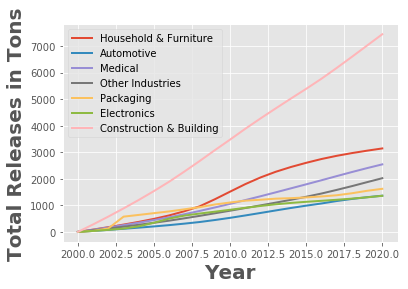

In [4]:
TiO2_data = np.loadtxt('./data/TiO2_production_real.csv',delimiter=',')
TiO2_to_paints = 0.3 # what portion of SiO2 are used in coating, paints and pigment market
TiO2_data[:,1] = TiO2_data[:,1] * TiO2_to_paints

market_data_dict = csv_to_dict('./data/coating_market_fake.csv')

# set up the model
TiO2_market = vt.vintage_market(TiO2_data,market_data_dict)
test = TiO2_market.calculate_market_vintage()
# save the results to data frame and plot the market figure
df = TiO2_market.to_dataframe(test)
TiO2_market.plot_market_vintage()

df.to_csv('./results/dynamic_results/TiO2_vintage_results_0226.csv')


### Calculate the release of sinlge vintage

year = 2000

In [ ]:
TiO2_data = np.loadtxt('./data/TiO2_production_real.csv',delimiter=',')
TiO2_to_paints = 0.3 # what portion of SiO2 are used in coating, paints and pigment market
TiO2_data[:,1] = TiO2_data[:,1] * TiO2_to_paints

# set up the model
TiO2_market = vt.vintage_market(TiO2_data,market_data_dict)
year_2000 = TiO2_market.calculate_for_one_vintage(2000)
df = TiO2_market.to_dataframe(year_2000)
df.to_csv('./results/TiO2_vintage_results_2000.csv')

### Calculate the Default Release for SiO2

market share of SiO2: 10%
other parameters are specified in the file: ./data/coating_market_fake.csv

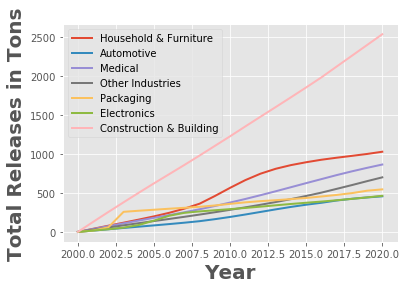

In [5]:
# read data now
SiO2_data = np.loadtxt('./data/SiO2_production_real.csv',delimiter=',')
SiO2_to_paints = 0.1 # what portion of SiO2 are used in coating, paints and pigment market
SiO2_data[:,1] = SiO2_data[:,1] * SiO2_to_paints
market_data_dict = csv_to_dict('./data/coating_market_fake.csv')

SiO2_market = vt.vintage_market(SiO2_data,market_data_dict)
test = SiO2_market.calculate_market_vintage()
df = SiO2_market.to_dataframe(test)
SiO2_market.plot_market_vintage()
df.to_csv('./results/dynamic_results/SiO2_vintage_results_0226.csv')

### Calculate the Default Release for FeOx

market share of SiO2: 33%
other parameters are specified in the file: ./data/coating_market_fake.csv

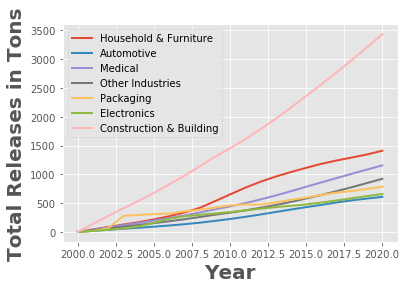

In [7]:
 # read data now
Fe_data = np.loadtxt('./data/Fe_production_real.csv',delimiter=',')
Fe_to_paints = 0.33 # what portion of SiO2 are used in coating, paints and pigment market
Fe_data[:,1] = Fe_data[:,1] * Fe_to_paints
market_data_dict = csv_to_dict('./data/coating_market_fake.csv')

FeO2_market = vt.vintage_market(Fe_data,market_data_dict)
test = FeO2_market.calculate_market_vintage()
df = FeO2_market.to_dataframe(test)
FeO2_market.plot_market_vintage()
df.to_csv('./results/dynamic_results/FeOx_vintage_results_0226.csv')